<a href="https://colab.research.google.com/github/sebastianpabon23/GitHub/blob/master/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
vinos= pd.read_csv('caracteristicas de vinos.csv',engine='python')


NameError: name 'pd' is not defined

In [20]:
vinos.head()


,Vino,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,3,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,4,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,5,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [21]:
vinos_variables=vinos.drop(['Vino'],axis=1)


In [22]:
vinos_variables.describe()


,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [23]:
vinos_norm=(vinos_variables-vinos_variables.min())/(vinos_variables.max()-vinos_variables.min())

In [24]:
vinos_norm.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,max_iter=300)
    kmeans.fit(vinos_norm)      #Aplicacion de k-means a las bdd
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

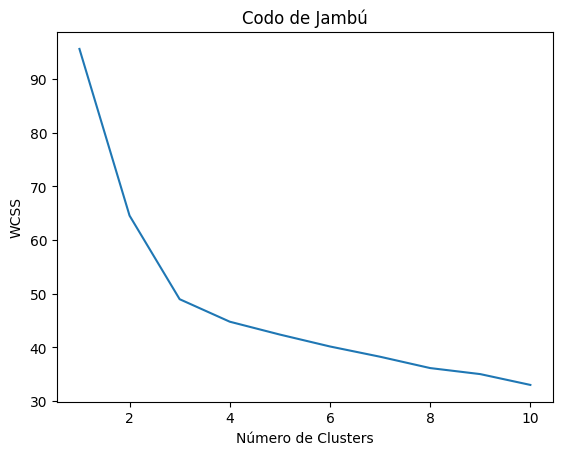

In [26]:
plt.plot(range(1,11), wcss)
plt.title("Codo de Jambú")
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS') #WCSS. Es un indicador de que tan similares son los individuos dentro de los Clusters
plt.show()

In [27]:
clustering =KMeans(n_clusters=3,max_iter=300) #Creacion del modelo
clustering.fit(vinos_norm) #Aplica el modelo a la bdd

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [28]:
vinos['KMeans_Clusters']=clustering.labels_ #Los resultados del clustering se guardan en labels_ dentro del modelo
print(vinos.head())

   Vino  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     2    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     3    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     4    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     5    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  \
0           0.28             2.29   5.64  1.04      3.92     1065   
1           0.26             1.28   4.38  1.05      3.40     1050   
2           0.30             2.81   5.68  1.03      3.17     1185   
3           0.24             2.18   7.80  0.86      3.45     1480   
4           0.39             1.82   4.32  1.04      2.93      735   

   KMeans_Clusters  
0                0  
1                0  
2                0  
3                0  
4                

In [29]:
from sklearn.decomposition import PCA

pca = PCA (n_components=2)
pca_vinos = pca.fit_transform(vinos_norm)
pca_vinos_df = pd.DataFrame(data = pca_vinos, columns = ['Componente_1', 'Componente_2'])
pca_nombres_vinos = pd.concat([pca_vinos_df, vinos[['KMeans_Clusters']]], axis=1)

print(pca_nombres_vinos)


     Componente_1  Componente_2  KMeans_Clusters
0       -0.706336     -0.253193                0
1       -0.484977     -0.008823                0
2       -0.521172     -0.189187                0
3       -0.821644     -0.580906                0
4       -0.202546     -0.059467                0
..            ...           ...              ...
173      0.739510     -0.471901                1
174      0.581781     -0.348366                1
175      0.626313     -0.546857                1
176      0.572991     -0.425516                1
177      0.701764     -0.513505                1

[178 rows x 3 columns]


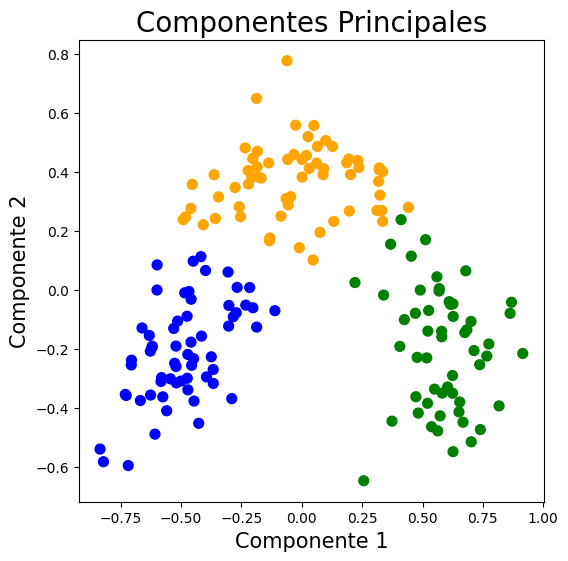

In [30]:
fig = plt.figure(figsize = (6,6) )

ax = fig.add_subplot(1, 1,1)
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('Componentes Principales', fontsize = 20)

color_theme = np.array(["blue", "green", "orange"])
ax.scatter(x = pca_nombres_vinos.Componente_1, y = pca_nombres_vinos.Componente_2,
           c=color_theme[pca_nombres_vinos.KMeans_Clusters], s = 50)

plt.show()

In [31]:
vinos.to_csv('K-Means.csv')